In [2]:
#import the librery
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import multilabel_confusion_matrix,r2_score,mean_squared_error

In [3]:
#import dataset 
dataset = pd.read_csv('data.csv')

In [ ]:
#show the dataset top 10 row
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
#check for the null cell
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#drop unwanted column
dataset.drop(columns=['id','Unnamed: 32'],inplace=True)

In [7]:
#check if any numll value is here
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#show the clean value
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
#separeted the independent and dependet variable from the data set
x_ind = dataset.iloc[:,1:]
y_dep = dataset.iloc[:, [0]]

In [9]:
print(f"{x_ind.head(10)}-------independent variable------'")

print(f"{y_dep.head(10)}-------dependent varaible--------'")


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [ ]:
#splite the independet and dependet data in the train and test data
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,test_size=0.2,random_state=43)

In [11]:
#shape of x_train,x_test,y_train,y_test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

In [12]:
#scaling the data
## apply the formula x' = x-mean/sd
scale = StandardScaler()
scale.fit(x_train)##calculate the mean and stader deviation
x_train_scl = scale.transform(x_train)
x_test_scl = scale.transform(x_test)

In [ ]:
#comvert the array data to pandas frame scale data
x_train_scl_df = pd.DataFrame(x_train_scl,columns=x_train.columns)
x_test_scl_df = pd.DataFrame(x_test_scl,columns=x_test.columns)

In [14]:
x_test_scl_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.258204,0.200759,-0.216950,-0.323504,-0.949533,0.319771,0.142766,-0.532854,-0.770238,0.217253,...,-0.183661,-0.028258,0.214246,-0.269347,-0.539066,1.881453,1.826803,0.296226,-0.105983,2.227471
1,-0.833699,2.305832,-0.878693,-0.763496,-1.537642,-1.283733,-1.115463,-1.249642,-2.700478,-1.127607,...,-0.903508,2.013361,-0.958039,-0.774228,-1.740264,-1.251871,-1.321184,-1.727344,-2.159251,-1.376466
2,0.729164,0.533378,0.731957,0.592376,-0.015602,0.528714,0.563837,0.272996,0.282296,-0.904909,...,0.750913,0.533187,0.759015,0.581855,1.046182,0.768073,1.276049,0.976216,3.133654,0.116555
3,-0.277952,-0.134139,-0.253305,-0.346779,1.371912,0.334563,0.411853,0.607480,1.110052,0.716152,...,-0.136626,0.362521,-0.145007,-0.224855,2.022730,0.971568,1.082541,1.386299,1.587683,1.844364
4,0.551438,-0.273111,0.527716,0.433934,0.062578,0.160751,0.061417,0.254020,0.157419,-0.048827,...,0.732508,-0.064943,0.626504,0.588726,-0.044224,-0.214971,0.024249,0.085965,-0.191067,-0.143410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.354120,-0.758371,-0.344805,-0.409595,-0.672734,-0.183358,-0.505782,-0.468335,-0.138717,-0.067626,...,-0.379983,-0.615224,-0.310794,-0.423440,-0.052982,-0.023158,-0.317631,-0.218241,1.024198,-0.165302
110,-0.182036,-0.081740,-0.166706,-0.280879,0.674634,0.179242,-0.046591,0.111826,-0.038816,-0.293215,...,-0.314542,0.242895,-0.306082,-0.369499,0.454998,-0.009632,0.329636,0.439382,-0.393344,-0.401734
111,-0.105868,-0.787988,-0.155677,-0.202919,-0.574129,-0.699431,-0.984034,-0.998222,-1.469548,-0.627261,...,-0.218426,-1.304270,-0.289298,-0.315558,-1.103975,-0.931198,-1.152309,-1.233456,-1.688877,-0.881164
112,-1.485927,-1.049983,-1.363971,-1.161705,0.106246,0.889281,-0.043352,-0.522986,0.303704,3.901879,...,-1.350754,-1.596158,-1.329954,-1.040840,-0.512791,-0.092014,-0.632622,-1.013651,-1.054756,1.324434


In [15]:
x_test_scl_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.258204,0.200759,-0.216950,-0.323504,-0.949533,0.319771,0.142766,-0.532854,-0.770238,0.217253,...,-0.183661,-0.028258,0.214246,-0.269347,-0.539066,1.881453,1.826803,0.296226,-0.105983,2.227471
1,-0.833699,2.305832,-0.878693,-0.763496,-1.537642,-1.283733,-1.115463,-1.249642,-2.700478,-1.127607,...,-0.903508,2.013361,-0.958039,-0.774228,-1.740264,-1.251871,-1.321184,-1.727344,-2.159251,-1.376466
2,0.729164,0.533378,0.731957,0.592376,-0.015602,0.528714,0.563837,0.272996,0.282296,-0.904909,...,0.750913,0.533187,0.759015,0.581855,1.046182,0.768073,1.276049,0.976216,3.133654,0.116555
3,-0.277952,-0.134139,-0.253305,-0.346779,1.371912,0.334563,0.411853,0.607480,1.110052,0.716152,...,-0.136626,0.362521,-0.145007,-0.224855,2.022730,0.971568,1.082541,1.386299,1.587683,1.844364
4,0.551438,-0.273111,0.527716,0.433934,0.062578,0.160751,0.061417,0.254020,0.157419,-0.048827,...,0.732508,-0.064943,0.626504,0.588726,-0.044224,-0.214971,0.024249,0.085965,-0.191067,-0.143410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-0.354120,-0.758371,-0.344805,-0.409595,-0.672734,-0.183358,-0.505782,-0.468335,-0.138717,-0.067626,...,-0.379983,-0.615224,-0.310794,-0.423440,-0.052982,-0.023158,-0.317631,-0.218241,1.024198,-0.165302
110,-0.182036,-0.081740,-0.166706,-0.280879,0.674634,0.179242,-0.046591,0.111826,-0.038816,-0.293215,...,-0.314542,0.242895,-0.306082,-0.369499,0.454998,-0.009632,0.329636,0.439382,-0.393344,-0.401734
111,-0.105868,-0.787988,-0.155677,-0.202919,-0.574129,-0.699431,-0.984034,-0.998222,-1.469548,-0.627261,...,-0.218426,-1.304270,-0.289298,-0.315558,-1.103975,-0.931198,-1.152309,-1.233456,-1.688877,-0.881164
112,-1.485927,-1.049983,-1.363971,-1.161705,0.106246,0.889281,-0.043352,-0.522986,0.303704,3.901879,...,-1.350754,-1.596158,-1.329954,-1.040840,-0.512791,-0.092014,-0.632622,-1.013651,-1.054756,1.324434


In [16]:
#create column transform for selected  the numeric and categotical conumn fro the traindata
num_column_transform = x_train.select_dtypes(include=['float64','int64']).columns
cat_column_transform = x_train.select_dtypes(include=['object']).columns

In [17]:
#create a pipiline for the numeric and catgorical data
num_transfrom_pipeline = Pipeline(steps=[
            ('num',SimpleImputer(strategy='mean')),
            ('scal',StandardScaler())
])
cat_transfrom_pipeline =Pipeline(steps=[
                ('cat',SimpleImputer(strategy='most_frequent')),
                ('one_hot',OneHotEncoder())
                            ])

In [18]:
#create columns tranfroms for the preprocesing
preprocessing = ColumnTransformer( 
    transformers=[
        ('num_trasf',num_transfrom_pipeline,num_column_transform),
        ('cat_transf',cat_transfrom_pipeline,cat_column_transform)
    ]
)

In [19]:
#create pipeline for the model and preprocessing
my_model = Pipeline([('prep',preprocessing),
                     ('classifier',RandomForestClassifier())
])

In [20]:
paraparam_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features':['sqrt','auto','log2']
    
}

In [21]:
params_grid=GridSearchCV(my_model,paraparam_grid,cv=5,scoring='neg_mean_squared_error')

In [22]:
params_grid.fit(x_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num_trasf',
                                                                         Pipeline(steps=[('num',
                                                                                          SimpleImputer()),
                                                                                         ('scal',
                                                                                          StandardScaler())]),
                                                                         Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'rad...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder())]),
                                                                         Index([], dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__max_features': ['sqrt', 'auto', 'log2'],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [23]:
#show the best estimeter
params_grid.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num_trasf',
                                                  Pipeline(steps=[('num',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perime...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                                 ('cat_transf',
                                                  Pipeline(steps=[('cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder())]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [24]:
#show the best parametrs
params_grid.best_params_

{'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 50}

In [25]:
#predict the data
y_pred = params_grid.predict(x_test)
# reshape the y_pred to 2d array for OnehotEncoding

y_pred = y_pred.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
encoder  = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

y_pred_ecoder = encoder.fit_transform(y_pred)
y_test_ecoder = encoder.fit_transform(y_test)


In [26]:
#mean_squared error
mean_squared_error(y_test_ecoder,y_pred_ecoder)

0.017543859649122806

In [27]:
#find score of the model
r2_score(y_test_ecoder,y_pred_ecoder)

0.9220512820512822

In [28]:
multilabel_confusion_matrix(y_test_ecoder,y_pred_ecoder)

array([[[37,  2],
        [ 0, 75]],

       [[75,  0],
        [ 2, 37]]], dtype=int64)

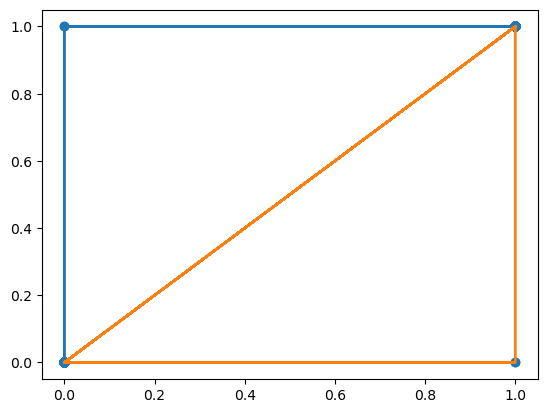

In [29]:
plt.scatter(y_test_ecoder,y_pred_ecoder)
plt.plot(y_test_ecoder,y_pred_ecoder)
plt.show()

In [37]:
#import the jonlib 
import joblib


In [1]:
#creqte pickle file
joblib.dump(params_grid, 'breast_cancer.joblib')

NameError: name 'joblib' is not defined

In [39]:
#load the pickle file
breast_cancer = joblib.load(open('breast_cancer.joblib','rb'))

In [40]:
dataset.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [41]:
##create input for the model testing
input_1 = pd.DataFrame([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,
                       0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,
                       0.05373,0.01587,0.03003,0.00619,25.38,17.33,184.6,2019,0.1622,
                       0.6656,0.7119,0.2654,0.4601,0.1189]],columns=['radius_mean','texture_mean','perimeter_mean','area_mean',
                                                                     'smoothness_mean','compactness_mean','concavity_mean',
                                                                     'concave points_mean','symmetry_mean','fractal_dimension_mean',
                                                                     'radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                                                                     'compactness_se','concavity_se','concave points_se','symmetry_se',
                                                                     'fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
                                                                     'area_worst','smoothness_worst','compactness_worst','concavity_worst',
                                                                     'concave points_worst','symmetry_worst','fractal_dimension_worst'])


In [42]:
breast_cancer.predict(input_1)

array(['M'], dtype=object)